<a href="https://colab.research.google.com/github/yibesh/DeepLearning/blob/main/ID_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   temperature   humidity  motion  label
0    27.483571  63.993554       1      1
1    24.308678  59.246337       0      0
2    28.238443  50.596304       1      1
3    32.615149  43.530632       0      1
4    23.829233  56.982233       0      0


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2, 32)          │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,273 (8.88 KB)

 Trainable params: 2,273 (8.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6577 - loss: 0.6506 - val_accuracy: 0.7400 - val_loss: 0.5652
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7130 - loss: 0.5743 - val_accuracy: 0.7300 - val_loss: 0.5129
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7491 - loss: 0.5071 - val_accuracy: 0.7600 - val_loss: 0.4773
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7760 - loss: 0.5083 - val_accuracy: 0.7700 - val_loss: 0.4515
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8231 - loss: 0.4392 - val_accuracy: 0.7650 - val_loss: 0.4386
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7945 - loss: 0.4434 - val_accuracy: 0.8000 - val_loss: 0.4201
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7754 - loss: 0.4332 - val_accuracy: 0.7500 - val_loss: 0.4284
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7861 - loss: 0.4245 - val_accuracy: 0.7700 - val_loss:

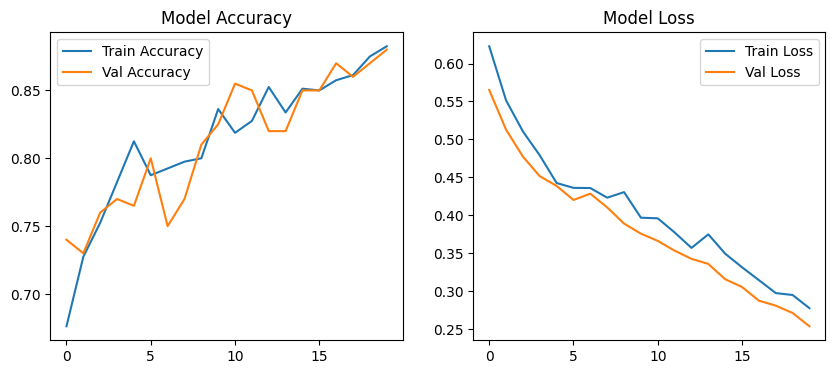

In [1]:
# 1D CNN for IoT sensor data classification
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1. Load dataset
# ------------------------------------------------------------
data = pd.read_csv("Iot_Sensor_data.csv")  # Update path if needed
print(data.head())

# Features and labels
X = data[['temperature', 'humidity', 'motion']].values
y = data['label'].values

# ------------------------------------------------------------
# 2. Preprocess data
# ------------------------------------------------------------
# Scale features (helps CNN training)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape input for 1D CNN: (samples, timesteps, features)
# Here each sample is a short sequence of sensor readings
X = X.reshape((X.shape[0], X.shape[1], 1))  # 3 timesteps, 1 feature per timestep

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------------------------------------
# 3. Build 1D CNN model
# ------------------------------------------------------------
model = Sequential([
    # 1D Convolution Layer
    # Filters = 32 → number of feature detectors
    # Kernel size = 2 → looks at 2 time steps at a time
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),  # Reduces sequence length by half
    Dropout(0.2),

    # Flatten converts 1D features into vector
    Flatten(),

    # Fully connected layer (Dense)
    Dense(64, activation='relu'),
    Dropout(0.3),

    # Output layer — 1 neuron with sigmoid for binary classification
    Dense(1, activation='sigmoid')
])

# ------------------------------------------------------------
# 4. Compile the model
# ------------------------------------------------------------
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# ------------------------------------------------------------
# 5. Train the model
# ------------------------------------------------------------
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# ------------------------------------------------------------
# 6. Evaluate performance
# ------------------------------------------------------------
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

# ------------------------------------------------------------
# 7. Plot training accuracy and loss
# ------------------------------------------------------------
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend(); plt.title('Model Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Model Loss')
plt.show()